#### Convolutional Neural Network

dataset download link
https://www.kaggle.com/chetankv/dogs-cats-images

In [1]:
# Below code is for limiting the GPU memory usage

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.2.0'

In [4]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
# Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,  #Normalizing 0-1 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# rescale shud be done for test, rest all should not be.
# for train set we have to do all

# creates some more images data -- Data augmentation

In [5]:
# loading the training set
training_set = train_datagen.flow_from_directory(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\train',
                                                 target_size = (64, 64), #image size
                                                 batch_size = 32,        
                                                 class_mode = 'binary')  #(categorical)

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# only rescale thats it, nothing more. It can lead to overfitting.


# loading the test set
test_set = test_datagen.flow_from_directory(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')    #(categorical)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.layers import Conv2D

In [7]:
# Part 2 - Building the simple CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()  #imp for forward & backward propagation

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))

# second Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  #(softmax)

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Parameters calculation for Conv2d layers

number_parameters = out_channels * (in_channels * kernel_h * kernel_w + 1)  # 1 for bias  
  
in_channels = 3  
out_channels = 32  
kernel_h = kernel_w = 3  
number_parameters = 32(3*3*3 + 1) = 896  

In [9]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                                  # categorical_crossentropy
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 500)

Epoch 1/500
250/250 [==============================] - 33s 130ms/step - loss: 0.6694 - accuracy: 0.5861 - val_loss: 0.6502 - val_accuracy: 0.6090
Epoch 2/500
250/250 [==============================] - 33s 134ms/step - loss: 0.6086 - accuracy: 0.6694 - val_loss: 0.6006 - val_accuracy: 0.6810
Epoch 3/500
250/250 [==============================] - 39s 156ms/step - loss: 0.5714 - accuracy: 0.7040 - val_loss: 0.5951 - val_accuracy: 0.6885
Epoch 4/500
250/250 [==============================] - 36s 145ms/step - loss: 0.5452 - accuracy: 0.7211 - val_loss: 0.5397 - val_accuracy: 0.7450
Epoch 5/500
250/250 [==============================] - 38s 152ms/step - loss: 0.5226 - accuracy: 0.7424 - val_loss: 0.5146 - val_accuracy: 0.7420
Epoch 6/500
250/250 [==============================] - 39s 154ms/step - loss: 0.4977 - accuracy: 0.7569 - val_loss: 0.5216 - val_accuracy: 0.7460
Epoch 7/500
250/250 [==============================] - 35s 139ms/step - loss: 0.4771 - accuracy: 0.7734 - val_loss: 0.4876 -

Epoch 57/500
250/250 [==============================] - 30s 119ms/step - loss: 0.1136 - accuracy: 0.9560 - val_loss: 0.7140 - val_accuracy: 0.7940
Epoch 58/500
250/250 [==============================] - 29s 117ms/step - loss: 0.1147 - accuracy: 0.9553 - val_loss: 0.7364 - val_accuracy: 0.7965
Epoch 59/500
250/250 [==============================] - 29s 117ms/step - loss: 0.1094 - accuracy: 0.9590 - val_loss: 0.7738 - val_accuracy: 0.7870
Epoch 60/500
250/250 [==============================] - 29s 117ms/step - loss: 0.1100 - accuracy: 0.9584 - val_loss: 0.8420 - val_accuracy: 0.7805
Epoch 61/500
250/250 [==============================] - 29s 117ms/step - loss: 0.1108 - accuracy: 0.9581 - val_loss: 0.7999 - val_accuracy: 0.7835
Epoch 62/500
250/250 [==============================] - 30s 119ms/step - loss: 0.1109 - accuracy: 0.9576 - val_loss: 0.7498 - val_accuracy: 0.8035
Epoch 63/500
250/250 [==============================] - 29s 117ms/step - loss: 0.1084 - accuracy: 0.9588 - val_loss: 0

250/250 [==============================] - 29s 116ms/step - loss: 0.0698 - accuracy: 0.9765 - val_loss: 1.0329 - val_accuracy: 0.7930
Epoch 113/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0516 - accuracy: 0.9818 - val_loss: 1.0555 - val_accuracy: 0.8055
Epoch 114/500
250/250 [==============================] - 31s 122ms/step - loss: 0.0483 - accuracy: 0.9835 - val_loss: 1.1153 - val_accuracy: 0.7995
Epoch 115/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0582 - accuracy: 0.9803 - val_loss: 1.0783 - val_accuracy: 0.8080
Epoch 116/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0613 - accuracy: 0.9793 - val_loss: 1.1255 - val_accuracy: 0.7855
Epoch 117/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0596 - accuracy: 0.9790 - val_loss: 1.0636 - val_accuracy: 0.8095
Epoch 118/500
250/250 [==============================] - 30s 120ms/step - loss: 0.0508 - accuracy: 0.9822 - val_loss: 1.0560 -

250/250 [==============================] - 29s 117ms/step - loss: 0.0337 - accuracy: 0.9881 - val_loss: 1.2265 - val_accuracy: 0.8050
Epoch 168/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0343 - accuracy: 0.9870 - val_loss: 1.1996 - val_accuracy: 0.8075
Epoch 169/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0392 - accuracy: 0.9870 - val_loss: 1.2899 - val_accuracy: 0.7970
Epoch 170/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0327 - accuracy: 0.9886 - val_loss: 1.2608 - val_accuracy: 0.8045
Epoch 171/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0427 - accuracy: 0.9849 - val_loss: 1.3677 - val_accuracy: 0.7985
Epoch 172/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0432 - accuracy: 0.9860 - val_loss: 1.2401 - val_accuracy: 0.8010
Epoch 173/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 1.2799 -

250/250 [==============================] - 29s 117ms/step - loss: 0.0287 - accuracy: 0.9901 - val_loss: 1.3573 - val_accuracy: 0.8120
Epoch 223/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0381 - accuracy: 0.9874 - val_loss: 1.4024 - val_accuracy: 0.8055
Epoch 224/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0271 - accuracy: 0.9900 - val_loss: 1.2680 - val_accuracy: 0.8115
Epoch 225/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0270 - accuracy: 0.9901 - val_loss: 1.2860 - val_accuracy: 0.8160
Epoch 226/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 1.3101 - val_accuracy: 0.8065
Epoch 227/500
250/250 [==============================] - 30s 119ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 1.3466 - val_accuracy: 0.8075
Epoch 228/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 1.3505 -

250/250 [==============================] - 29s 117ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 1.3971 - val_accuracy: 0.8065
Epoch 278/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0207 - accuracy: 0.9925 - val_loss: 1.3732 - val_accuracy: 0.8045
Epoch 279/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 1.2802 - val_accuracy: 0.8055
Epoch 280/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0163 - accuracy: 0.9939 - val_loss: 1.3991 - val_accuracy: 0.8115
Epoch 281/500
250/250 [==============================] - 30s 121ms/step - loss: 0.0192 - accuracy: 0.9934 - val_loss: 1.5553 - val_accuracy: 0.7970
Epoch 282/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 1.5234 - val_accuracy: 0.7985
Epoch 283/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0268 - accuracy: 0.9904 - val_loss: 1.4262 -

250/250 [==============================] - 30s 120ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 1.5070 - val_accuracy: 0.8050
Epoch 333/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 1.5873 - val_accuracy: 0.7900
Epoch 334/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 1.4152 - val_accuracy: 0.8090
Epoch 335/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0223 - accuracy: 0.9921 - val_loss: 1.5662 - val_accuracy: 0.7990
Epoch 336/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 1.4855 - val_accuracy: 0.7955
Epoch 337/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0173 - accuracy: 0.9936 - val_loss: 1.4287 - val_accuracy: 0.8085
Epoch 338/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0162 - accuracy: 0.9940 - val_loss: 1.5965 -

250/250 [==============================] - 29s 117ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 1.6661 - val_accuracy: 0.7990
Epoch 388/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 1.6635 - val_accuracy: 0.8010
Epoch 389/500
250/250 [==============================] - 30s 120ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 1.6830 - val_accuracy: 0.8050
Epoch 390/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 1.6663 - val_accuracy: 0.8030
Epoch 391/500
250/250 [==============================] - 29s 118ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 1.6005 - val_accuracy: 0.8075
Epoch 392/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 1.5929 - val_accuracy: 0.8145
Epoch 393/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 1.7300 -

250/250 [==============================] - 29s 117ms/step - loss: 0.0137 - accuracy: 0.9949 - val_loss: 1.6448 - val_accuracy: 0.8070
Epoch 443/500
250/250 [==============================] - 30s 122ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 1.6633 - val_accuracy: 0.8115
Epoch 444/500
250/250 [==============================] - 30s 120ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 1.5985 - val_accuracy: 0.8105
Epoch 445/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0110 - accuracy: 0.9958 - val_loss: 1.7506 - val_accuracy: 0.8150
Epoch 446/500
250/250 [==============================] - 30s 118ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 1.5545 - val_accuracy: 0.8135
Epoch 447/500
250/250 [==============================] - 30s 119ms/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 1.6265 - val_accuracy: 0.8080
Epoch 448/500
250/250 [==============================] - 30s 119ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 1.6361 -

250/250 [==============================] - 30s 119ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 1.6156 - val_accuracy: 0.8140
Epoch 498/500
250/250 [==============================] - 30s 119ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 1.7070 - val_accuracy: 0.8070
Epoch 499/500
250/250 [==============================] - 30s 119ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 1.7128 - val_accuracy: 0.8060
Epoch 500/500
250/250 [==============================] - 29s 117ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 1.7046 - val_accuracy: 0.8005


In [10]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [11]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [48]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test\cats\cat.4123.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [51]:
result

array([[5.6209383e-13]], dtype=float32)

In [52]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat


In [ ]:
# code Breakdown

In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image

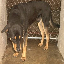

In [61]:
test_image = image.load_img(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test\dogs\dog.4163.jpg', target_size = (64,64))
test_image

In [62]:
test_image = image.img_to_array(test_image)
print(test_image.shape)
test_image


(64, 64, 3)


array([[[232., 211., 184.],
        [219., 199., 172.],
        [191., 161., 137.],
        ...,
        [145., 125., 100.],
        [196., 175., 148.],
        [197., 176., 149.]],

       [[230., 209., 182.],
        [212., 192., 165.],
        [200., 170., 146.],
        ...,
        [166., 146., 121.],
        [191., 170., 143.],
        [214., 193., 166.]],

       [[233., 212., 185.],
        [209., 189., 162.],
        [209., 179., 155.],
        ...,
        [187., 167., 142.],
        [203., 182., 155.],
        [204., 183., 156.]],

       ...,

       [[213., 178., 140.],
        [195., 160., 122.],
        [179., 144., 106.],
        ...,
        [134., 108.,  75.],
        [170., 146., 112.],
        [194., 170., 136.]],

       [[212., 174., 129.],
        [210., 171., 130.],
        [166., 134.,  93.],
        ...,
        [146., 118.,  81.],
        [153., 125.,  88.],
        [148., 119.,  87.]],

       [[199., 161., 116.],
        [209., 170., 129.],
        [172., 1

In [63]:
test_image=test_image/255
print(test_image.shape)
test_image

(64, 64, 3)


array([[[0.9098039 , 0.827451  , 0.72156864],
        [0.85882354, 0.78039217, 0.6745098 ],
        [0.7490196 , 0.6313726 , 0.5372549 ],
        ...,
        [0.5686275 , 0.49019608, 0.39215687],
        [0.76862746, 0.6862745 , 0.5803922 ],
        [0.77254903, 0.6901961 , 0.58431375]],

       [[0.9019608 , 0.81960785, 0.7137255 ],
        [0.83137256, 0.7529412 , 0.64705884],
        [0.78431374, 0.6666667 , 0.57254905],
        ...,
        [0.6509804 , 0.57254905, 0.4745098 ],
        [0.7490196 , 0.6666667 , 0.56078434],
        [0.8392157 , 0.75686276, 0.6509804 ]],

       [[0.9137255 , 0.83137256, 0.7254902 ],
        [0.81960785, 0.7411765 , 0.63529414],
        [0.81960785, 0.7019608 , 0.60784316],
        ...,
        [0.73333335, 0.654902  , 0.5568628 ],
        [0.79607844, 0.7137255 , 0.60784316],
        [0.8       , 0.7176471 , 0.6117647 ]],

       ...,

       [[0.8352941 , 0.69803923, 0.54901963],
        [0.7647059 , 0.627451  , 0.47843137],
        [0.7019608 , 0

In [64]:
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)
test_image

# one 64x64 3 channel image

(1, 64, 64, 3)


array([[[[0.9098039 , 0.827451  , 0.72156864],
         [0.85882354, 0.78039217, 0.6745098 ],
         [0.7490196 , 0.6313726 , 0.5372549 ],
         ...,
         [0.5686275 , 0.49019608, 0.39215687],
         [0.76862746, 0.6862745 , 0.5803922 ],
         [0.77254903, 0.6901961 , 0.58431375]],

        [[0.9019608 , 0.81960785, 0.7137255 ],
         [0.83137256, 0.7529412 , 0.64705884],
         [0.78431374, 0.6666667 , 0.57254905],
         ...,
         [0.6509804 , 0.57254905, 0.4745098 ],
         [0.7490196 , 0.6666667 , 0.56078434],
         [0.8392157 , 0.75686276, 0.6509804 ]],

        [[0.9137255 , 0.83137256, 0.7254902 ],
         [0.81960785, 0.7411765 , 0.63529414],
         [0.81960785, 0.7019608 , 0.60784316],
         ...,
         [0.73333335, 0.654902  , 0.5568628 ],
         [0.79607844, 0.7137255 , 0.60784316],
         [0.8       , 0.7176471 , 0.6117647 ]],

        ...,

        [[0.8352941 , 0.69803923, 0.54901963],
         [0.7647059 , 0.627451  , 0.47843137]

In [65]:
result = cnn.predict(test_image)
result

array([[0.9999995]], dtype=float32)

In [66]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
